# Lab03: Charts

Your Job – Let’s pretend that you are an entry level planner who has been asked to provide a demographic description for your boss with both total population and percent of total population. She is going to a city meeting and asked that you provide the information in a good visual representation. She would like an easy to read table for her records and either a bar chart or a pie chart that she can present at the meeting.

In [98]:
import pandas as pd
import numpy as np
import re

In [99]:
# read in 2021 census data
data_21 = pd.read_csv('~/git/cp101.github.io/labs/lab03/census21_data.csv')
data_21

,Unnamed: 0,GeoUID,Type,Region Name,Area (sq km),Population,Dwellings,Households,CMA_UID,PR_UID,...,"v_CA21_954: $45,000 to $49,999","v_CA21_955: $50,000 to $59,999","v_CA21_956: $60,000 to $69,999","v_CA21_957: $70,000 to $79,999","v_CA21_958: $80,000 to $89,999","v_CA21_959: $90,000 to $99,999","v_CA21_960: $100,000 and over","v_CA21_961: $100,000 to $124,999","v_CA21_962: $125,000 to $149,999","v_CA21_963: $150,000 and over"
0,1,5350001.00,CT,1.00,6.8192,599,253,235,35535,NaN,...,10.0,10.0,15.0,20.0,10.0,10.0,130.0,20.0,25.0,80.0
1,2,5350002.00,CT,2.00,3.3926,604,294,284,35535,NaN,...,15.0,20.0,20.0,25.0,25.0,15.0,95.0,40.0,20.0,35.0
2,3,5350003.00,CT,3.00,0.9455,457,279,265,35535,NaN,...,5.0,25.0,25.0,20.0,25.0,10.0,85.0,35.0,15.0,30.0
3,4,5350004.00,CT,4.00,0.3404,6306,3620,3276,35535,NaN,...,185.0,335.0,275.0,200.0,160.0,110.0,395.0,165.0,100.0,135.0
4,5,5350005.00,CT,5.00,0.3764,6957,4235,3720,35535,NaN,...,160.0,340.0,295.0,275.0,235.0,170.0,830.0,315.0,195.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,581,5350378.26,CT,378.26,1.6267,4867,1234,1213,35535,NaN,...,35.0,45.0,65.0,90.0,90.0,85.0,725.0,220.0,190.0,310.0
581,582,5350378.27,CT,378.27,19.9096,5547,1565,1526,35535,NaN,...,55.0,115.0,105.0,125.0,140.0,125.0,740.0,275.0,195.0,265.0
582,583,5350378.28,CT,378.28,2.2278,6946,2017,1931,35535,NaN,...,60.0,130.0,115.0,130.0,135.0,130.0,950.0,295.0,235.0,425.0
583,584,5350802.01,CT,802.01,2.1742,4011,1328,1303,35535,NaN,...,30.0,70.0,65.0,75.0,75.0,90.0,750.0,205.0,200.0,350.0


In [100]:
# fix missingness and data types
data_21 = data_21.fillna(0)
data_21 = data_21.replace({'NA': 0})
data_21 = data_21.replace({'': 0})
data_21.iloc[:,4:] = data_21.iloc[:,4:].apply(pd.to_numeric)
# pad to get correct geouid length
data_21["GeoUID"] = data_21["GeoUID"].astype(str).str.ljust(10, "0")

In [101]:
data_21.columns

Index(['Unnamed: 0', 'GeoUID', 'Type', 'Region Name', 'Area (sq km)',
       'Population', 'Dwellings', 'Households', 'CMA_UID', 'PR_UID', 'CSD_UID',
       'CD_UID',
       'v_CA21_4872: Total - Visible minority for the population in private households',
       'v_CA21_4875: Total visible minority population',
       'v_CA21_4878: South Asian', 'v_CA21_4881: Chinese',
       'v_CA21_4884: Black', 'v_CA21_4887: Filipino', 'v_CA21_4890: Arab',
       'v_CA21_4893: Latin American', 'v_CA21_4896: Southeast Asian',
       'v_CA21_4899: West Asian', 'v_CA21_4902: Korean',
       'v_CA21_4905: Japanese', 'v_CA21_4908: Visible minority, n.i.e.',
       'v_CA21_4911: Multiple visible minorities',
       'v_CA21_4914: Not a visible minority',
       'v_CA21_7632: Total - Main mode of commuting for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address',
       'v_CA21_7635: Car, truck or van', 'v_CA21_7644: Public transit',
       'v_CA21_7647:

In [102]:
# subset to needed columns for analysis
data_subset = data_21.iloc[:,1:27].drop(columns = ["Type", "CMA_UID", "PR_UID", "CSD_UID", "CD_UID"])
# clean the names
data_subset = data_subset.rename(columns = {x: re.sub(r"v_CA\d{2}_\d+: ", "", x) for x in data_subset.columns.tolist()})
data_subset

,GeoUID,Region Name,Area (sq km),Population,Dwellings,Households,Total - Visible minority for the population in private households,Total visible minority population,South Asian,Chinese,...,Filipino,Arab,Latin American,Southeast Asian,West Asian,Korean,Japanese,"Visible minority, n.i.e.",Multiple visible minorities,Not a visible minority
0,5350001.00,1.00,6.8192,599,253,235,590.0,185.0,35.0,25.0,...,30.0,0.0,15.0,0.0,0.0,0.0,10.0,0.0,50.0,405.0
1,5350002.00,2.00,3.3926,604,294,284,600.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0
2,5350003.00,3.00,0.9455,457,279,265,525.0,275.0,90.0,20.0,...,20.0,60.0,35.0,10.0,0.0,0.0,0.0,0.0,25.0,245.0
3,5350004.00,4.00,0.3404,6306,3620,3276,5905.0,2985.0,475.0,145.0,...,330.0,65.0,180.0,225.0,30.0,0.0,15.0,750.0,140.0,2925.0
4,5350005.00,5.00,0.3764,6957,4235,3720,6730.0,3210.0,540.0,270.0,...,295.0,85.0,200.0,205.0,50.0,50.0,10.0,330.0,210.0,3520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,5350378.26,378.26,1.6267,4867,1234,1213,4960.0,4820.0,3230.0,460.0,...,395.0,50.0,10.0,55.0,65.0,0.0,0.0,80.0,130.0,140.0
581,5350378.27,378.27,19.9096,5547,1565,1526,5535.0,5255.0,3175.0,100.0,...,685.0,30.0,60.0,65.0,0.0,0.0,0.0,280.0,180.0,280.0
582,5350378.28,378.28,2.2278,6946,2017,1931,6925.0,6545.0,3435.0,265.0,...,445.0,70.0,125.0,55.0,120.0,0.0,0.0,475.0,280.0,380.0
583,5350802.01,802.01,2.1742,4011,1328,1303,3850.0,2295.0,1050.0,155.0,...,320.0,50.0,30.0,70.0,70.0,0.0,0.0,90.0,145.0,1555.0


First – Python plotting libraries can generate visualization using data from tables. As a result, we need to start by creating a table with the information requested. What statistics do you need to generate? (Hint: we need to generate summary statistics for the city). Now let’s calculate the amounts together. Do your summary statistics match your neighbors? How about the numbers projected at the front of the class?

In [111]:
# get sums, round to nearest whole number
# note- subsequent proportions and percentages will not sum to 1 or 100% due to this rounding
toronto_sums = data_subset.iloc[:,2:].sum().astype(int)
toronto_sums

Area (sq km)                                                             631
Population                                                           2794356
Dwellings                                                            1253238
Households                                                           1160892
Total - Visible minority for the population in private households    2761345
Total visible minority population                                    1537345
South Asian                                                           385400
Chinese                                                               296245
Black                                                                 264950
Filipino                                                              170355
Arab                                                                   41465
Latin American                                                         92350
Southeast Asian                                                        53580

In [112]:
# proportions by group
toronto_proportions = toronto_sums[6:] / toronto_sums[4]
toronto_proportions

South Asian                    0.139570
Chinese                        0.107283
Black                          0.095950
Filipino                       0.061693
Arab                           0.015016
Latin American                 0.033444
Southeast Asian                0.019404
West Asian                     0.024959
Korean                         0.015065
Japanese                       0.004576
Visible minority, n.i.e.       0.015272
Multiple visible minorities    0.023394
Not a visible minority         0.443255
dtype: float64

Second – Now that we have the necessary information, we need to put it into a good table. You can think about this as prettying up the table, but in reality what you are doing is making the information easily digestible. Your table should have all the information your boss needs, but nothing more. A great way to check if your tables are good is to ask a neighbor to explain what your table is showing in one sentence.

In [140]:
summary_table = pd.concat([toronto_sums[6:].to_frame(name = "Population"), toronto_proportions.to_frame(name = "Proportion")],axis = 1).sort_values(by = "Population", ascending = False)
summary_table

,Population,Proportion
Not a visible minority,1223980,0.443255
South Asian,385400,0.139570
Chinese,296245,0.107283
Black,264950,0.095950
Filipino,170355,0.061693
Latin American,92350,0.033444
West Asian,68920,0.024959
Multiple visible minorities,64600,0.023394
Southeast Asian,53580,0.019404
"Visible minority, n.i.e.",42170,0.015272


Third – Now that we have our table, let’s put in a chart. There are many chart options – we will talk about them later in the semester. For now, we are going to create two charts showing the demographics of Toronto using pandas `plot()` function.

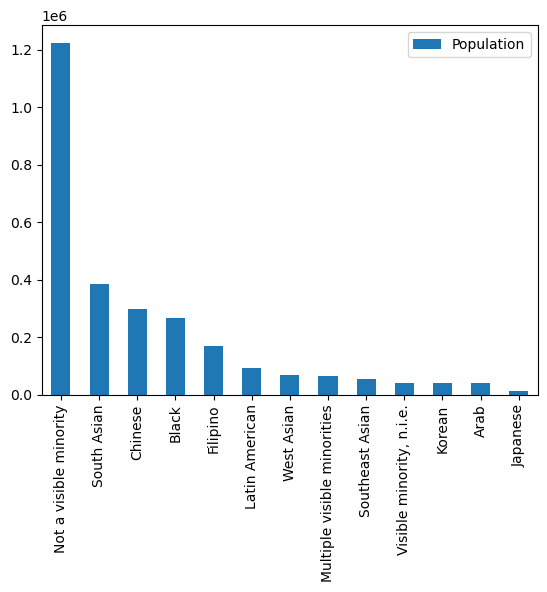

In [141]:
# a bar chart
summary_table.plot(y = 'Population', kind = 'bar');

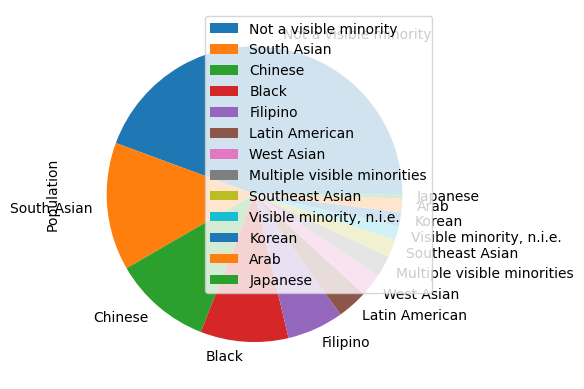

In [142]:
# a pie chart
summary_table.plot(y = 'Population', kind = 'pie');

You can select different colors by creating a mapping of legend values to color values and passing it in as a keyword argument.

Another website we recommend is [Color Brewer](http://colorbrewer2.org/). The website provides a number of color options for whatever kind of visual you are providing, and can be useful if you are thinking of presenting your tables (and later maps) to a wider audience. You can then use the information to manually adjust the colors for your visual. It can take a little time, so I would recommend finalizing your visual first and then doing color adjustments as the last step.

Now that you have done this for the City of Toronto, can you work with your neighbor to develop a table that provides demographic information for Census Tract 0038.00 and for the
City as a whole? Remember that each time you use these functions the more natural they become.